Explorative Data Analysis on a clothing sales company

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Thomas\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


explore

In [3]:
raw_data = pd.read_csv('sales_invoiced_lines_basics.csv', sep=',')
raw_data.head()

,Unnamed: 0,Id,DimEntityId,DimOrderTypeId,OrderTypeCode,DimGeographyId,Country,DimPostingDateId,DimGenderId,DimBillToCustomerId,...,RRSalesPriceDKK,DimOrderSalespersonId,DimOrderCountryManagerId,OrderHeaderNumber,OrderLineNumber,Inbound Duty,Quantity,Amount,Discount,Cost
0,0,460011,43,220,B2BSUP,167,Netherlands,20220312,2,1532,...,350.0,108,3,103142,20001,0.00,3.0,390.61,0.00,164.46
1,1,459456,43,220,B2BSUP,71,Finland,20220312,2,1715,...,450.0,112,2,103099,10002,0.12,2.0,351.18,21.06,151.96
2,2,460938,43,220,B2BSUP,57,Germany,20220312,2,1228,...,600.0,84,6,103113,50000,0.12,2.0,427.07,0.00,176.62
3,3,459441,43,220,B2BSUP,59,Denmark,20220312,1,2519,...,450.0,184,2,103083,30000,0.00,2.0,280.00,0.00,126.22
4,4,460101,43,220,B2BSUP,167,Netherlands,20220312,2,1532,...,800.0,108,3,103142,50003,0.12,1.0,316.21,0.00,160.48


In [4]:
#Printing all columns
print(raw_data.columns)

Index(['Unnamed: 0', 'Id', 'DimEntityId', 'DimOrderTypeId', 'OrderTypeCode',
       'DimGeographyId', 'Country', 'DimPostingDateId', 'DimGenderId',
       'DimBillToCustomerId', 'CustomerMainType', 'CustomerSubGroup',
       'DimCollectionId', 'DimItemId', 'ItemNo2', 'StyleID', 'Style', 'Color',
       'Size', 'EAN', 'Gender', 'Category', 'SUB Category', 'SUB Category2',
       'Quality', 'Origin Country', 'WHSSalesPriceDKK', 'RRSalesPriceDKK',
       'DimOrderSalespersonId', 'DimOrderCountryManagerId',
       'OrderHeaderNumber', 'OrderLineNumber', 'Inbound Duty', 'Quantity',
       'Amount', 'Discount', 'Cost'],
      dtype='object')


In [5]:
print('Shape of raw data: ' + str(raw_data.shape))
raw_data.describe()

Shape of raw data: (831459, 37)


,Unnamed: 0,Id,DimEntityId,DimOrderTypeId,DimGeographyId,DimPostingDateId,DimGenderId,DimBillToCustomerId,DimCollectionId,DimItemId,...,WHSSalesPriceDKK,RRSalesPriceDKK,DimOrderSalespersonId,DimOrderCountryManagerId,OrderLineNumber,Inbound Duty,Quantity,Amount,Discount,Cost
count,831459.000000,8.314590e+05,831459.0,831459.000000,831459.000000,8.314590e+05,831459.000000,831459.000000,831459.0,831459.000000,...,831459.000000,831459.000000,831459.000000,831459.000000,8.314590e+05,819683.000000,831459.000000,831459.000000,831459.000000,831459.000000
mean,415729.000000,1.839673e+06,43.0,225.883062,114.404270,2.023161e+07,1.508779,1828.504951,53.0,228983.895318,...,235.302855,604.832553,173.336640,2.180332,1.516198e+05,0.048116,1.886205,443.672980,56.477795,179.630284
std,240021.683073,1.105828e+06,0.0,24.850971,61.918222,7.670096e+03,0.500584,836.800294,0.0,201559.442276,...,145.361565,363.796695,102.511581,1.742974,3.376214e+05,0.058497,4.540327,826.167223,281.543195,345.168172
min,0.000000,2.000000e+00,43.0,-1.000000,-1.000000,2.022031e+07,1.000000,970.000000,53.0,20017.000000,...,0.000000,0.000000,-1.000000,-1.000000,1.000000e+00,0.000000,-1.000000,-477.380000,-477.380000,-453.360000
25%,207864.500000,7.731185e+05,43.0,220.000000,59.000000,2.022122e+07,1.000000,1094.000000,53.0,23383.000000,...,110.000000,300.000000,91.000000,2.000000,3.000000e+04,0.000000,1.000000,176.080000,0.000000,61.830000
50%,415729.000000,1.930284e+06,43.0,220.000000,76.000000,2.023083e+07,2.000000,1523.000000,53.0,262142.000000,...,195.000000,500.000000,197.000000,2.000000,6.000200e+04,0.000000,1.000000,308.600000,14.320000,123.840000
75%,623593.500000,2.884288e+06,43.0,244.000000,168.000000,2.024040e+07,2.000000,2358.000000,53.0,430423.000000,...,320.000000,800.000000,271.000000,3.000000,1.500020e+05,0.120000,2.000000,500.000000,38.500000,189.440000
max,831458.000000,3.529990e+06,43.0,244.000000,234.000000,2.024111e+07,4.000000,3931.000000,53.0,690362.000000,...,1480.000000,3700.000000,284.000000,7.000000,1.281000e+07,0.120000,1500.000000,215758.560000,52976.000000,75360.000000


##Data processing##

In [6]:
big_df = raw_data.set_index('Id')
big_df.drop(['Unnamed: 0'], axis=1, inplace=True)
big_df["DimPostingDateId"] = pd.to_datetime(big_df["DimPostingDateId"], format='%Y%m%d')
big_df.rename(columns={'DimPostingDateId': 'Date'}, inplace=True)

In [7]:
# Dropping missing values
print("Shape of big_df before dropping NaNs: " + str(big_df.shape))
print("Deleted rows: " + str(big_df.isnull().sum().sum()))
big_df.dropna(inplace=True)
print("Shape of big_df after dropping NaNs: " + str(big_df.shape))


Shape of big_df before dropping NaNs: (831459, 35)
Deleted rows: 21545
Shape of big_df after dropping NaNs: (810202, 35)


Save the dataframe as a cleaned version

In [8]:
big_df.to_csv("sales_invoiced_lines_basics_cleaned.csv")

Data Exploration

In [7]:
unique_categories = big_df['Category'].unique()
print("Unique categories: " + str(unique_categories))

Unique categories: ['Tops' 'Shirts' 'Trousers' 'Jeans' 'Knitwear' 'Dresses' 'Underwear'
 'Outerwear' 'Socks' 'Skirts' 'Sweats' 'Blazers' 'Shoes' 'Hats' 'Bags'
 'Shorts']


In [8]:
for category in unique_categories:
    print(category + " has the following subcategories")
    print(big_df[big_df['Category'] == category]['SUB Category'].unique(), end = '\n\n')

Tops has the following subcategories
['V-neck' 'Crew neck' 'Tank' 'Turtleneck' 'Crew Neck' 'Polo']

Shirts has the following subcategories
['Shirts' 'Overshirt']

Trousers has the following subcategories
['Trousers']

Jeans has the following subcategories
['Jeans']

Knitwear has the following subcategories
['Cardigan' 'Crew neck' 'V-neck' 'Turtleneck' 'Polo' 'Hoodie']

Dresses has the following subcategories
['Mini' 'Midi' 'Maxi']

Underwear has the following subcategories
['Panties' 'Bra']

Outerwear has the following subcategories
['Jacket' 'Raincoat']

Socks has the following subcategories
['Socks']

Skirts has the following subcategories
['Midi' 'Maxi']

Sweats has the following subcategories
['Crew neck' 'Hoodie']

Blazers has the following subcategories
['Blazers']

Shoes has the following subcategories
['Sneakers' 'Flats']

Hats has the following subcategories
['Beanie' 'Cap']

Bags has the following subcategories
['Tote']

Shorts has the following subcategories
['Shorts']



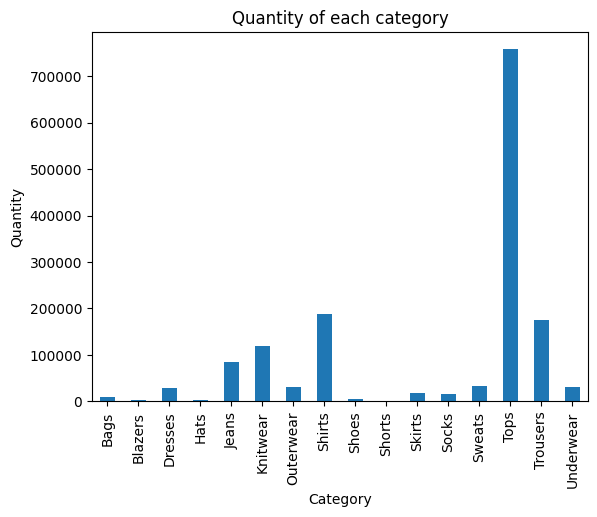

In [9]:
# Bar plot of each catagory and its quantity
category_quantity = big_df.groupby('Category')['Quantity'].sum()
category_quantity.plot(kind='bar')
plt.ylabel('Quantity')
plt.title('Quantity of each category')
plt.show()

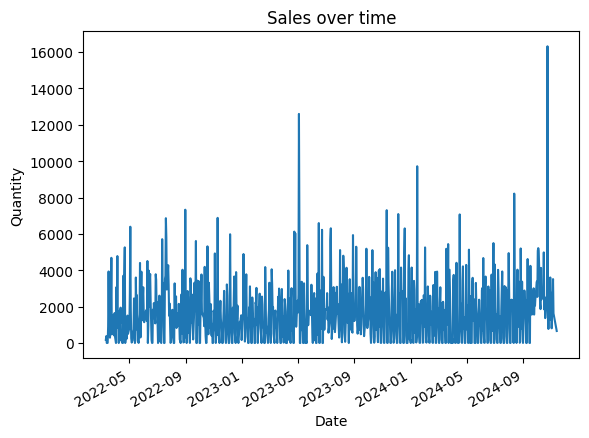

In [10]:
sales_over_time = big_df.groupby('Date')['Quantity'].sum()
sales_over_time.plot()
plt.ylabel('Quantity')
plt.title('Sales over time')
plt.show()

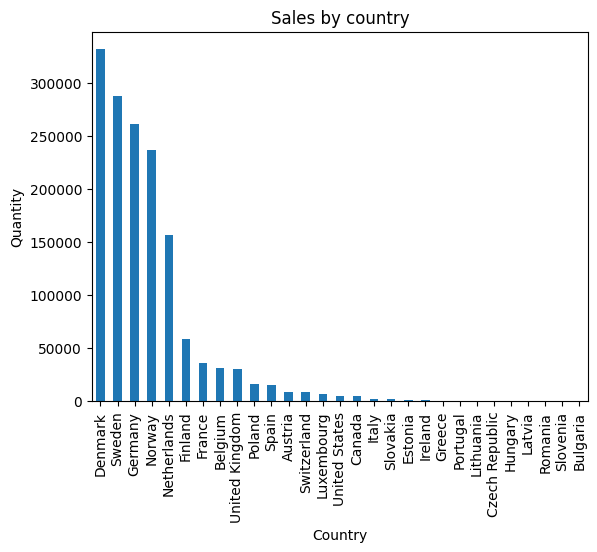

In [11]:
sales_by_country = big_df.groupby('Country')['Quantity'].sum()
saled_by_country_sorted = sales_by_country.sort_values(ascending=False)
saled_by_country_sorted.plot(kind='bar')
plt.ylabel('Quantity')
plt.title('Sales by country')
plt.show()

C:\Users\Thomas\AppData\Local\Temp\ipykernel_1428\1472441194.py:9: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  for date in pd.date_range(start=biggest_sale_by_date.index.min(), end=biggest_sale_by_date.index.max(), freq='Q'):


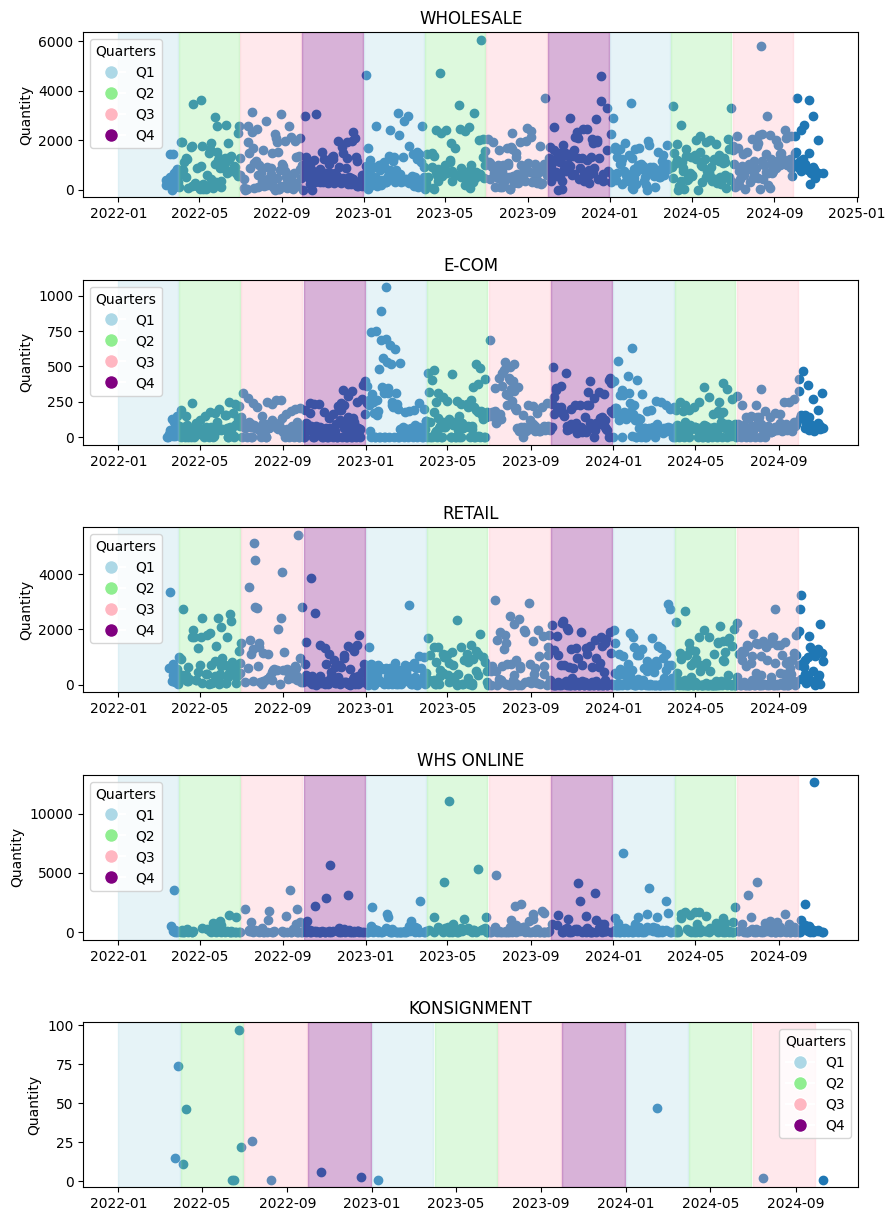

In [12]:
customer_types = big_df['CustomerMainType'].unique()
fig, axes = plt.subplots(customer_types.shape[0], 1, figsize=(10, 15))  # Increased figure height for more space
for customer_type in customer_types:
    biggest_sale_by_date = big_df[big_df["CustomerMainType"] == customer_type].groupby('Date')['Quantity'].sum().sort_values(ascending=False)
    ax = axes[customer_types.tolist().index(customer_type)]
    ax.scatter(biggest_sale_by_date.index, biggest_sale_by_date)
    ax.set_ylabel('Quantity')
    ax.set_title(customer_type)
    for date in pd.date_range(start=biggest_sale_by_date.index.min(), end=biggest_sale_by_date.index.max(), freq='Q'):
        quarter_start = date - pd.offsets.QuarterBegin(startingMonth=1)
        quarter_end = date - pd.offsets.Day(1)
        
        if date.month in [1, 2, 3]:  # Q1
            quarter_color = 'lightblue'
        elif date.month in [4, 5, 6]:  # Q2
            quarter_color = 'lightgreen'
        elif date.month in [7, 8, 9]:  # Q3
            quarter_color = 'lightpink'
        elif date.month in [10, 11, 12]:  # Q4
            quarter_color = 'purple'

        ax.axvspan(quarter_start, quarter_end, color=quarter_color, alpha=0.3)
    patch1 = plt.Line2D([0], [0], marker='o', color='w', label='Q1', markerfacecolor='lightblue', markersize=10)
    patch2 = plt.Line2D([0], [0], marker='o', color='w', label='Q2', markerfacecolor='lightgreen', markersize=10)
    patch3 = plt.Line2D([0], [0], marker='o', color='w', label='Q3', markerfacecolor='lightpink', markersize=10)
    patch4 = plt.Line2D([0], [0], marker='o', color='w', label='Q4', markerfacecolor='purple', markersize=10)
    ax.legend(handles=[patch1, patch2, patch3, patch4], title='Quarters')
        


plt.subplots_adjust(hspace=0.5) 
plt.show()


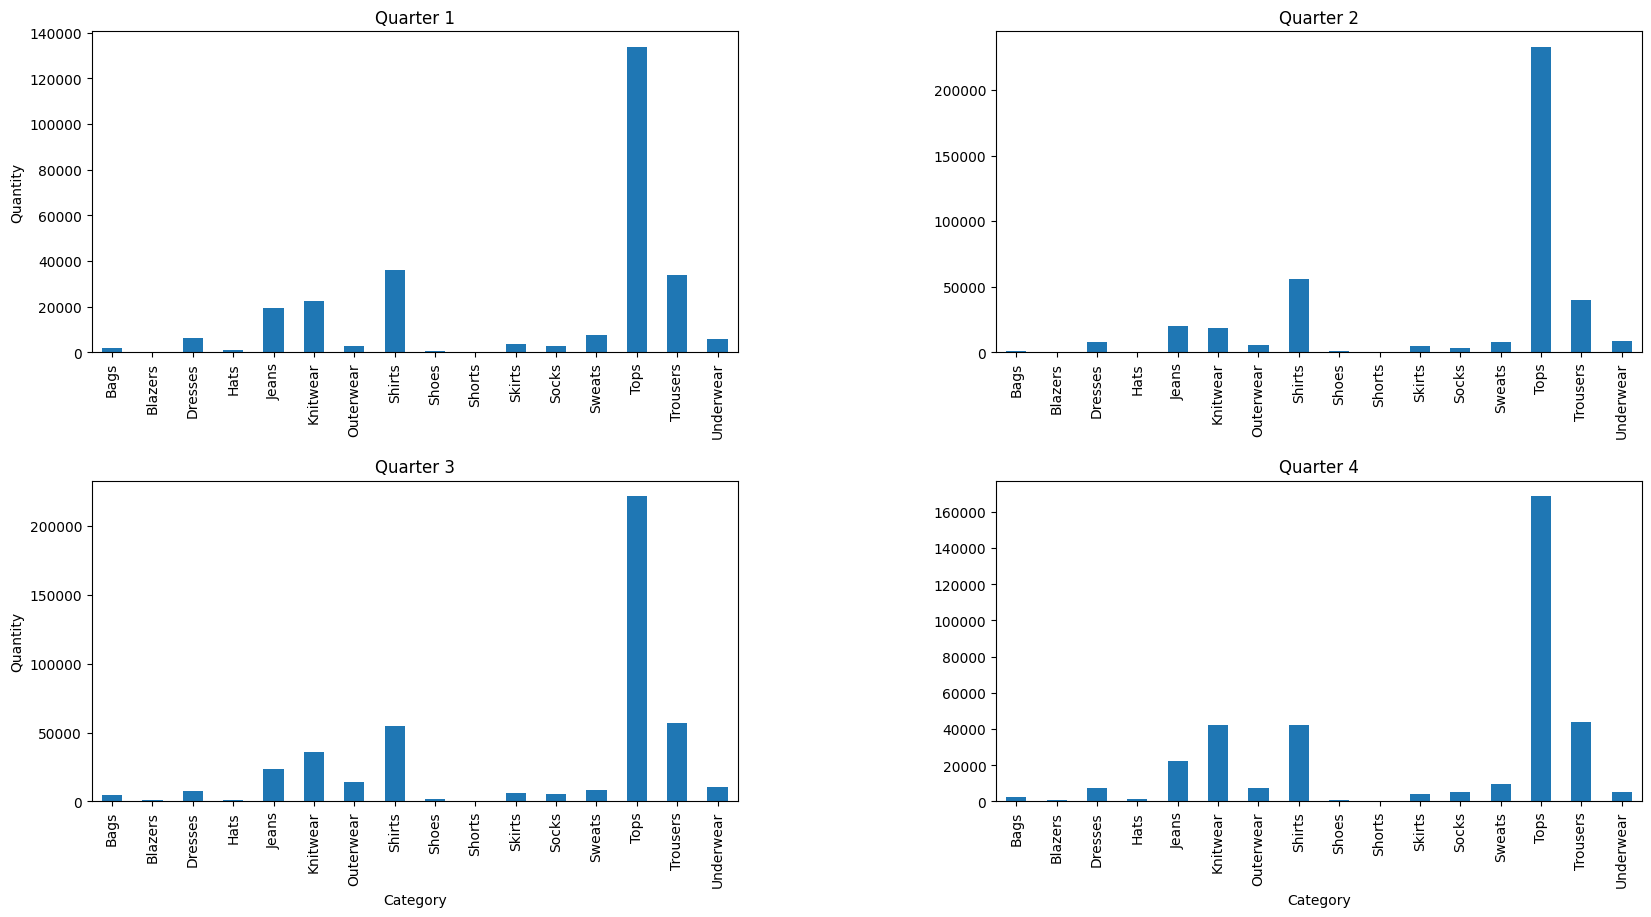

In [13]:
# Exploring seasonality
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
big_df['Quarter'] = big_df['Date'].dt.quarter
unique_quarters = big_df['Quarter'].unique()
for i, quarter in enumerate(unique_quarters):
    ax = axes[i//2, i%2]
    big_df[big_df['Quarter'] == quarter].groupby('Category')['Quantity'].sum().plot(kind="bar", ax=ax)
    ax.set_title('Quarter ' + str(quarter))
    if i == 0 or i == 2:
        ax.set_ylabel('Quantity')
    if i == 0 or i == 1:
        ax.set_xlabel('')

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

In [14]:
unique_quarters = big_df['Quarter'].unique()
list_of_quarters = []
for quarter in unique_quarters:
    list_of_quarters.append(big_df[big_df['Quarter'] == quarter].groupby('Category')['Quantity'].sum())

category_quarterly_procents= []
for category in unique_categories:
    category_procents = []
    for i,quarter_list in enumerate(list_of_quarters):
        quarter_sum = quarter_list.sum()
        category_sum = quarter_list[category]
        category_procents.append(("Quarter " + str(i) , round(category_sum / quarter_sum * 100, 2)))
    category_quarterly_procents.append((category, category_procents))
    print(category + " has the following procents: " + str(category_procents))

Tops has the following procents: [('Quarter 0', 48.13), ('Quarter 1', 56.93), ('Quarter 2', 48.84), ('Quarter 3', 46.41)]
Shirts has the following procents: [('Quarter 0', 12.94), ('Quarter 1', 13.69), ('Quarter 2', 12.13), ('Quarter 3', 11.55)]
Trousers has the following procents: [('Quarter 0', 12.15), ('Quarter 1', 9.74), ('Quarter 2', 12.56), ('Quarter 3', 12.02)]
Jeans has the following procents: [('Quarter 0', 6.98), ('Quarter 1', 4.83), ('Quarter 2', 5.19), ('Quarter 3', 6.16)]
Knitwear has the following procents: [('Quarter 0', 8.14), ('Quarter 1', 4.56), ('Quarter 2', 7.91), ('Quarter 3', 11.57)]
Dresses has the following procents: [('Quarter 0', 2.24), ('Quarter 1', 1.88), ('Quarter 2', 1.62), ('Quarter 3', 2.09)]
Underwear has the following procents: [('Quarter 0', 2.17), ('Quarter 1', 2.2), ('Quarter 2', 2.24), ('Quarter 3', 1.39)]
Outerwear has the following procents: [('Quarter 0', 1.03), ('Quarter 1', 1.42), ('Quarter 2', 3.17), ('Quarter 3', 1.99)]
Socks has the followi

In [15]:
# Statistical analysis of quarerly sales
category_quarterly_procents_df = pd.DataFrame(category_quarterly_procents)
category_quarterly_procents_df.set_index(0, inplace=True)
for q in range(4):
    category_quarterly_procents_df["Quarter " + str(q + 1)] = category_quarterly_procents_df[1].apply(lambda x: x[q][1])
category_quarterly_procents_df.drop([1], axis=1, inplace=True)
category_quarterly_procents_df.T.describe()


,Tops,Shirts,Trousers,Jeans,Knitwear,Dresses,Underwear,Outerwear,Socks,Skirts,Sweats,Blazers,Shoes,Hats,Bags,Shorts
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,50.077500,12.577500,11.617500,5.790000,8.045000,1.957500,2.000000,1.90250,1.080000,1.275000,2.307500,0.170000,0.277500,0.260000,0.645000,0.030000
std,4.680864,0.935428,1.272645,0.972043,2.863454,0.269119,0.407676,0.93243,0.250732,0.103441,0.451691,0.118322,0.115289,0.150997,0.282666,0.018257
min,46.410000,11.550000,9.740000,4.830000,4.560000,1.620000,1.390000,1.03000,0.840000,1.180000,1.910000,0.060000,0.170000,0.070000,0.290000,0.010000
25%,47.700000,11.985000,11.450000,5.100000,7.072500,1.815000,1.975000,1.32250,0.915000,1.217500,1.925000,0.075000,0.200000,0.190000,0.545000,0.017500
50%,48.485000,12.535000,12.085000,5.675000,8.025000,1.985000,2.185000,1.70500,1.035000,1.250000,2.275000,0.160000,0.255000,0.270000,0.655000,0.030000
75%,50.862500,13.127500,12.252500,6.365000,8.997500,2.127500,2.210000,2.28500,1.200000,1.307500,2.657500,0.255000,0.332500,0.340000,0.755000,0.042500
max,56.930000,13.690000,12.560000,6.980000,11.570000,2.240000,2.240000,3.17000,1.410000,1.420000,2.770000,0.300000,0.430000,0.430000,0.980000,0.050000


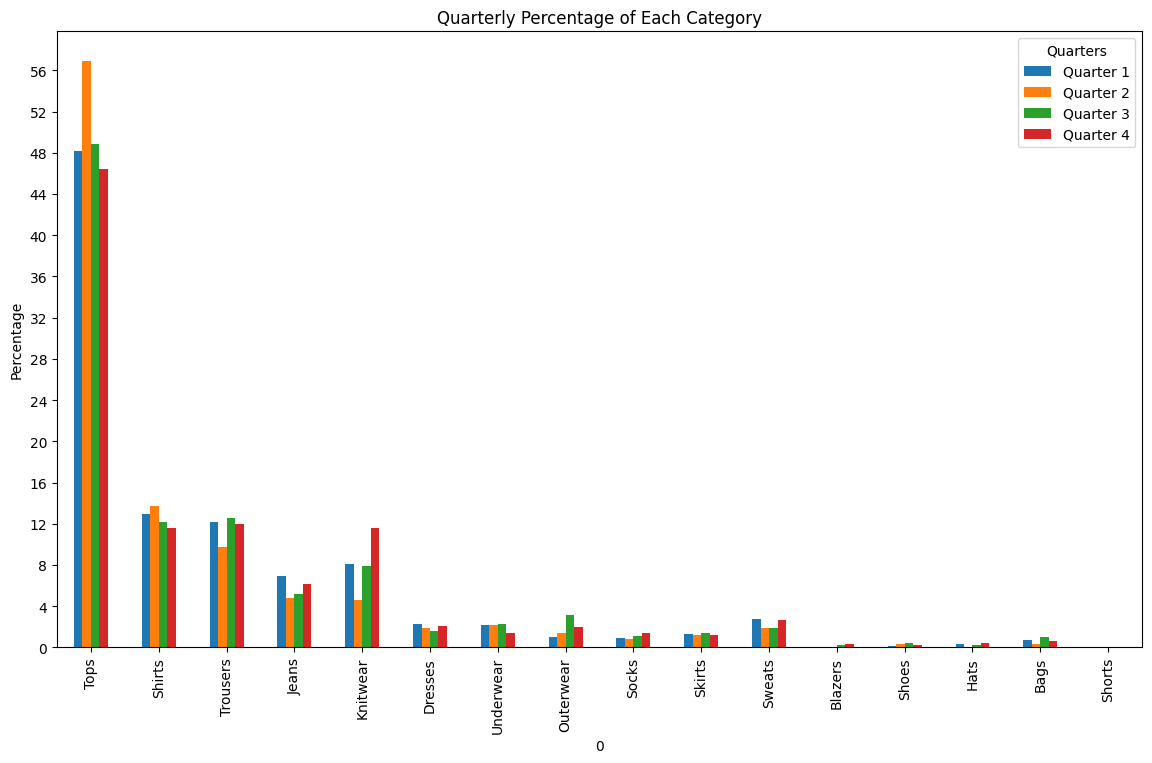

In [16]:
category_quarterly_procents_df.plot(kind='bar', figsize=(14, 8))
plt.ylabel('Percentage')
plt.title('Quarterly Percentage of Each Category')
plt.legend(title='Quarters')
plt.yticks(np.arange(0, 60, 4))
plt.show()

**Clustering based on products**

In [17]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [18]:
print(big_df.columns)

Index(['DimEntityId', 'DimOrderTypeId', 'OrderTypeCode', 'DimGeographyId',
       'Country', 'Date', 'DimGenderId', 'DimBillToCustomerId',
       'CustomerMainType', 'CustomerSubGroup', 'DimCollectionId', 'DimItemId',
       'ItemNo2', 'StyleID', 'Style', 'Color', 'Size', 'EAN', 'Gender',
       'Category', 'SUB Category', 'SUB Category2', 'Quality',
       'Origin Country', 'WHSSalesPriceDKK', 'RRSalesPriceDKK',
       'DimOrderSalespersonId', 'DimOrderCountryManagerId',
       'OrderHeaderNumber', 'OrderLineNumber', 'Inbound Duty', 'Quantity',
       'Amount', 'Discount', 'Cost', 'Quarter'],
      dtype='object')


In [19]:
columns_for_clustering = ['Category', 'Quantity', 'WHSSalesPriceDKK', 'RRSalesPriceDKK', 'Amount', 'Gender' , 'SUB Category']
numerical_columns = ['Quantity', 'WHSSalesPriceDKK', 'RRSalesPriceDKK', 'Amount']
categorical_columns = ['Category', 'Gender', 'SUB Category']

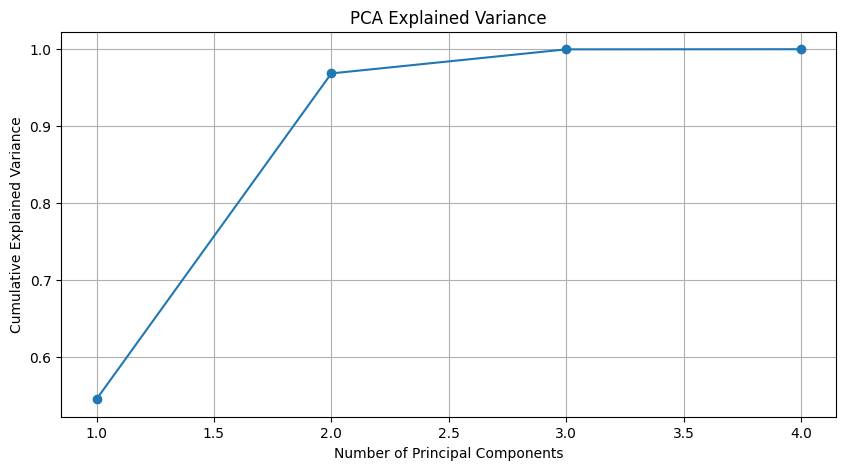

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select relevant columns/features from your big dataset
# One hot encoding for categorical columns
one_hot_encoded_df = pd.get_dummies(big_df, columns=categorical_columns, drop_first=True)
one_hot_encoded_columns = [col for col in one_hot_encoded_df.columns if col.startswith("Category") or col.startswith("Gender") or col.startswith("SUB Category")]
columns_for_clustering = numerical_columns + one_hot_encoded_columns
X = one_hot_encoded_df[columns_for_clustering]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_columns])

# Apply PCA
pca = PCA(n_components=None)  # Set to 'None' to keep all components initially
X_pca = pca.fit_transform(X_scaled)

# Check the explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

In [21]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)
df_preprocessed = preprocessor.fit_transform(big_df)

Using the elbow method to find the optimal within clustering sum of squares.

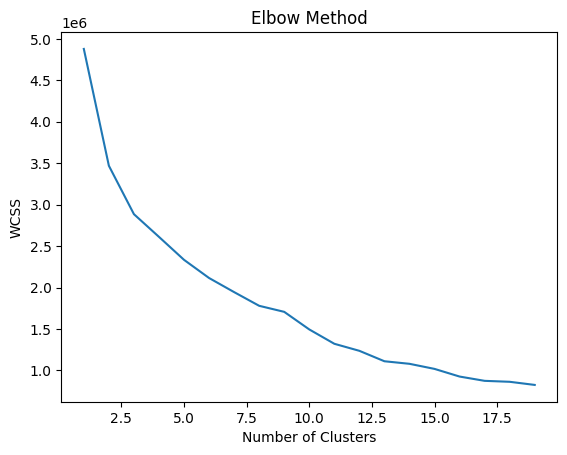

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Finding the optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_preprocessed)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 20), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [23]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(df_preprocessed)
big_df['Cluster'] = kmeans.labels_

Cluster analysis

columns_for_clustering = ['Category', 'Quantity', 'WHSSalesPriceDKK', 'RRSalesPriceDKK', 'Amount', 'Gender' , 'SUB Category']
numerical_columns = ['Quantity', 'WHSSalesPriceDKK', 'RRSalesPriceDKK', 'Amount']
categorical_columns = ['Category', 'Gender', 'SUB Category']

In [24]:
def plot_cluster_info(cluster):
    average_wholesale = big_df[big_df['Cluster'] == cluster]['WHSSalesPriceDKK'].mean()
    average_sales_price = big_df[big_df['Cluster'] == cluster]['RRSalesPriceDKK'].mean()
    average_amount = big_df[big_df['Cluster'] == cluster]['Amount'].mean()
    average_quantity = big_df[big_df['Cluster'] == cluster]['Quantity'].mean()
    gender_counts = big_df[big_df['Cluster'] == cluster]["Gender"].value_counts()
    category_counts = big_df[big_df['Cluster'] == cluster]["Category"].value_counts()
    sub_category_counts = big_df[big_df['Cluster'] == cluster]["SUB Category"].value_counts()

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()

    gender_counts.plot(kind='bar', ax=axes[0])
    axes[0].set_title('Gender Distribution in Cluster ' + str(cluster))
    axes[0].set_xlabel('Gender')
    axes[0].set_ylabel('Count')

    category_counts.plot(kind='bar', ax=axes[1])
    axes[1].set_title('Category Distribution in Cluster ' + str(cluster))
    axes[1].set_xlabel('Category')
    axes[1].set_ylabel('Count')

    sub_category_counts.plot(kind='bar', ax=axes[2])
    axes[2].set_title('Sub Category Distribution in Cluster ' + str(cluster))
    axes[2].set_xlabel('Sub Category')
    axes[2].set_ylabel('Count')

    avg_values = pd.Series({
        'Average Wholesale Price': average_wholesale,
        'Average Sales Price': average_sales_price,
        'Average Amount': average_amount,
        'Average Quantity': average_quantity
    })
    avg_values.plot(kind='bar', ax=axes[3])
    axes[3].set_title('Average Values in Cluster ' + str(cluster))
    axes[3].set_xlabel('Metric')
    axes[3].set_ylabel('Value')
    plt.tight_layout()
    plt.show()
    return avg_values

Plot the cluster infos

In [25]:
plot_clusters = False

In [26]:
highest_values = []
for i in range(10):
    if plot_clusters:
        average_values = plot_cluster_info(i)

Cluster analysis for time series forecasting

forecasting

These components are defined as follows:

Level: The average value in the series.
Trend: The increasing or decreasing value in the series.
Seasonality: The repeating short-term cycle in the series.
Noise: The random variation in the series.

Simple Clusters (low seasonality): Use ARIMA.

Complex Seasonality: Use Prophet.

Highly Non-linear Clusters: Consider LSTM or other deep learning methods.

Small Data Clusters: If clusters have limited data, use simpler models like Exponential Smoothing or SARIMA.

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
cluster_time_trends = []
for cluster in big_df['Cluster'].unique():
    series = big_df[big_df["Cluster"] == cluster].groupby('Date')['Quantity'].sum()
    series.index = pd.to_datetime(series.index)
    series = series.asfreq('D').fillna(0)
    
    result = seasonal_decompose(series, model='additive')
    
    seasonality_strength = result.seasonal.std() / series.std()
    trend_strength = result.trend.dropna().std() / series.std()
    residual_strength = result.resid.dropna().std() / series.std()
    
    seasonality = 'high' if seasonality_strength > 0.5 else 'low'
    trend = 'high' if trend_strength > 0.5 else 'low'
    volatility = 'high' if residual_strength > 0.5 else 'low'
    print(f'Cluster {cluster}: Seasonality is {seasonality}, Trend is {trend}, Volatility is {volatility}')
    cluster_time_trends.append((cluster, seasonality, trend, volatility))

Cluster 8: Seasonality is high, Trend is low, Volatility is high
Cluster 1: Seasonality is low, Trend is low, Volatility is high
Cluster 4: Seasonality is high, Trend is low, Volatility is high
Cluster 7: Seasonality is high, Trend is low, Volatility is high
Cluster 0: Seasonality is high, Trend is low, Volatility is high
Cluster 2: Seasonality is low, Trend is low, Volatility is high
Cluster 6: Seasonality is high, Trend is low, Volatility is high
Cluster 5: Seasonality is low, Trend is low, Volatility is high
Cluster 3: Seasonality is high, Trend is high, Volatility is high
Cluster 9: Seasonality is low, Trend is low, Volatility is high


Prophet

**Time Series Forecasting Naive Attempt**

In [28]:
def mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

09:18:16 - cmdstanpy - INFO - Chain [1] start processing
09:18:17 - cmdstanpy - INFO - Chain [1] done processing


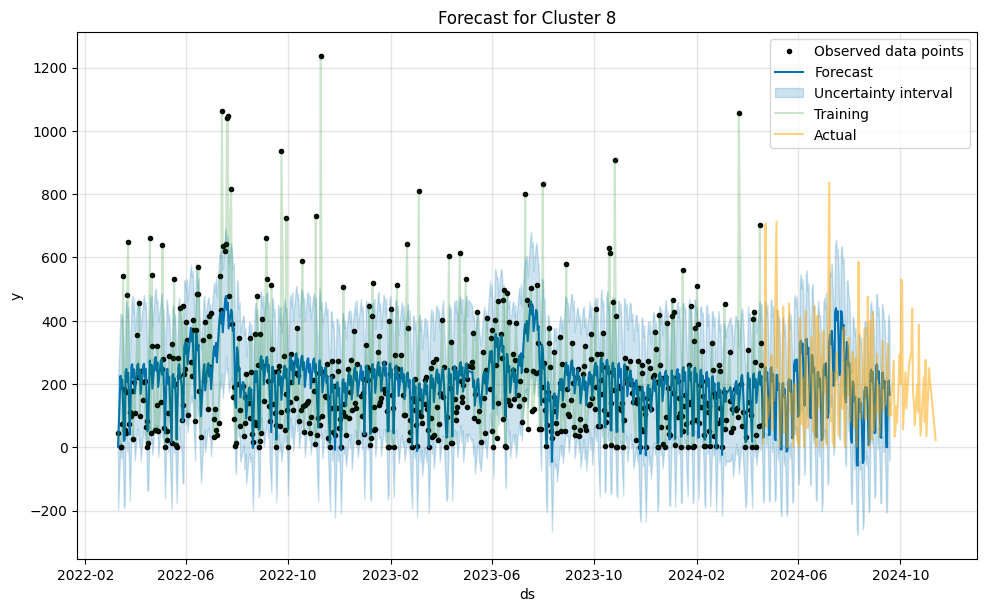

1081.1


In [29]:
from prophet import Prophet
def forecast_prophet(params = None, show_plot = True):
    # Loop through each cluster and forecast
    for cluster in cluster_time_trends:
        if cluster[1] == 'low':
            continue
        cluster_data = big_df[big_df['Cluster'] == cluster[0]].groupby('Date')['Quantity'].sum().reset_index()
        cluster_data.rename(columns={'Date': 'ds', 'Quantity': 'y'}, inplace=True)
        
        # Split the data into training and testing sets
        train_size = int(len(cluster_data) * 0.8)
        train_data = cluster_data[:train_size]
        test_data = cluster_data[train_size:]
        
        if params is not None:
            model = Prophet(**params)
        else:
            model = Prophet()
        model.fit(train_data)
        
        future = model.make_future_dataframe(periods=len(test_data))
        forecast = model.predict(future)
        
        # Plot forecast
        if show_plot:
            fig = model.plot(forecast)
            plt.title(f'Forecast for Cluster {cluster[0]}')
            plt.plot(train_data['ds'], train_data['y'], color='green', alpha=0.2, label='Training')
            plt.plot(test_data['ds'], test_data['y'], color='orange', alpha=0.5, label='Actual')
            plt.legend()
            plt.show()

        error = mape(test_data['y'], forecast['yhat'])
        return error
    
print(forecast_prophet())

Prophet with hyper parameter optimization using MANGO

In [30]:
import logging
logger = logging.getLogger('cmdstanpy')
logger.addHandler(logging.NullHandler())
logger.propagate = False
logger.setLevel(logging.CRITICAL)

In [31]:
from scipy.stats import uniform
from mango import scheduler, Tuner

param_space = dict(growth = ['linear', 'logistic', 'flat'],
                   n_changepoints  = range(0, 55, 5),
                   changepoint_range  = uniform(0.5, 0.5),
                   yearly_seasonality = [True, False],
                   weekly_seasonality = [True, False],
                   daily_seasonality = [True, False],
                   seasonality_mode = ['additive', 'multiplicative'],
                   seasonality_prior_scale=uniform(5.0, 15.0),
                   changepoint_prior_scale=uniform(0.0, 0.1),
                   interval_width = uniform(0.2, 0.8),
                   uncertainty_samples = [500, 1000, 1500, 2000]
                   )

def objective_function(args_list):
    global train_df, test_df
    
    params_evaluated = []
    results = []
    
    
    for params in args_list:
        try:
            error = forecast_prophet(params, show_plot=False)
            params_evaluated.append(params)
            results.append(error)
        except:
            #print(f"Exception raised for {params}")
            #pass 
            params_evaluated.append(params)
            results.append(100000000)# Giving high loss for exceptions regions of spaces
        
        #print(params_evaluated, mse)
    return params_evaluated, results

conf_Dict = dict()
conf_Dict['initial_random'] = 10
conf_Dict['num_iteration'] = 50
tuner = Tuner(param_space, objective_function, conf_Dict)
results = tuner.minimize()
print('best parameters:', results['best_params'])
print('best loss:', results['best_objective'])



Best score: 834.62: 100%|██████████| 50/50 [03:26<00:00,  4.14s/it]

best parameters: {'changepoint_prior_scale': 0.03603921428164384, 'changepoint_range': 0.7136010623751028, 'daily_seasonality': False, 'growth': 'linear', 'interval_width': 0.21782158579219085, 'n_changepoints': 40, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 11.011984905048163, 'uncertainty_samples': 1500, 'weekly_seasonality': True, 'yearly_seasonality': False}
best loss: 834.62


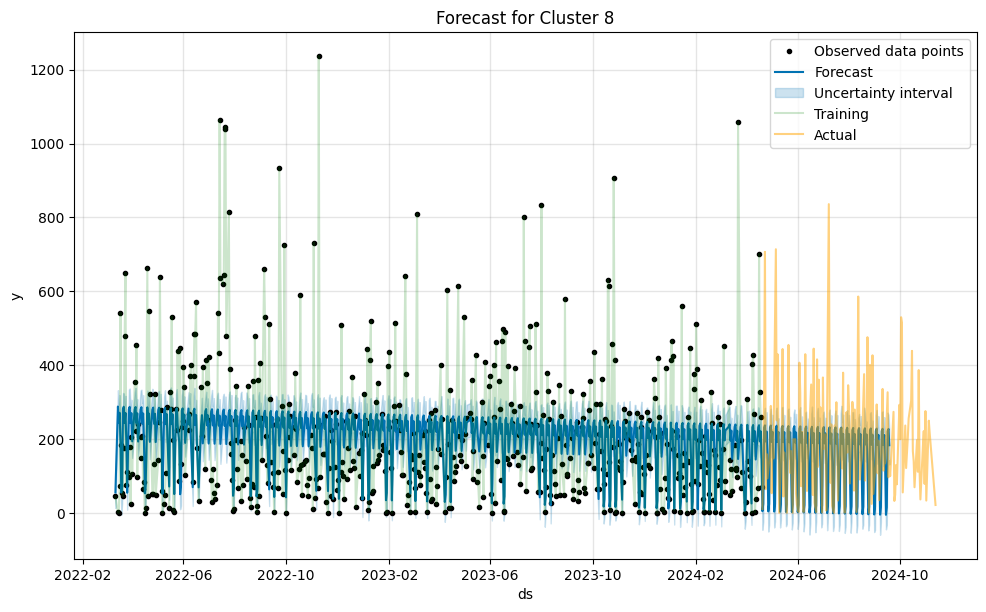

834.62

In [32]:
forecast_prophet(results['best_params'])

Investigate DARTS library

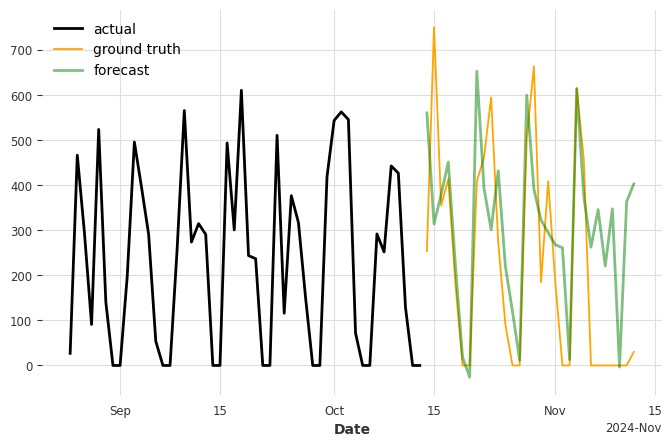

In [89]:
from darts.models import XGBModel
from darts import TimeSeries
target = big_df[big_df['Cluster'] == 0].groupby('Date')['Quantity'].sum().asfreq('D').fillna(0)[:-30]
# set target as TimeSeries
target = TimeSeries.from_series(target)
model = XGBModel(
    lags=12,
    output_chunk_length=6,
)
model.fit(target)
pred = model.predict(30)


plt.figure(figsize=(8, 5))
target[-50:].plot(label='actual')
ground_truth = big_df[big_df['Cluster'] == 0].groupby('Date')['Quantity'].sum().asfreq('D').fillna(0)[-30:]
plt.plot(ground_truth.index, ground_truth, label='ground truth', color='orange')
pred.plot(label='forecast', lw=2, color = 'green', alpha = 0.5)
plt.legend()
plt.show()